### 기본 설정

In [1]:
import pytesseract
import os, re
from time import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import tempfile
from PIL import Image
import random

In [2]:
# pytesseract 환경변수 설정
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

# tesseract-trained-data 인식
lang_trained_data = 'eng'


### Tesseract 적용
1) Before preprocessing  
2) After preprocessing

In [3]:
# 기존 테서렉트로부터 OCR
def ImgToText(image,trained_data):
    start_training_time=time()
    result=pytesseract.image_to_string(image,config='--psm 6 oem 3 -c tessdit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz',
                                       lang=trained_data)
    end_training_time=time()
    convert_time = end_training_time-start_training_time
    return result, convert_time

## Before Preprocessing 평가

In [29]:
# 이미지 불러오기
image_dir = 'C:/Users/duadp/CAPTCHA/captcha/'
os.chdir(image_dir)

image_list = os.listdir(image_dir)

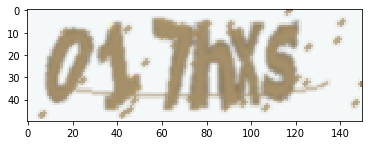

In [31]:
ex = cv2.imread(image_list[11])
ex = cv2.cvtColor(ex, cv2.COLOR_BGR2RGB)
plt.imshow(ex)

In [32]:
# True_label 저장
True_label = []
for i in range(len(image_list)):
    True_label.append(image_list[i][:-4])
#     True_label.append(list("".join(image_list[i][:-4])))

In [33]:
# image to text tesseract 적용
result = []
result_time = 0
for i in image_list:
    txt, t = ImgToText(i, lang_trained_data)
    result.append(txt)
    result_time+=t

In [34]:
print("Image to Text, Converted Time : ", result_time)

Image to Text, Converted Time :  4144.650492191315


### 평가

In [76]:
# 평가
# 0~9, a~z의 결과만 나오도록 함
def tess_Accuracy(True_label, Pred_label):
    size = len(True_label)
    new_Pred_label=[]
    for result in Pred_label:
        new = re.sub('[^0-9a-z]','',result)
        new_Pred_label.append(new)
    
    cnt = 0
    for i in range(size):
        if True_label[i]==new_Pred_label[i]:
            cnt=cnt+1
            
    # 정확도 계산
    acc = cnt/size
    return new_Pred_label ,cnt, acc

In [48]:
new_result, count, acc = tess_Accuracy(True_label, result)
print("Number of words : ", len(True_label))
print("Correct words of Tesseract-OCR : ", count)
print("Accuracy of Tesseract-OCR : ", acc)

Number of words :  10000
Correct words of Tesseract-OCR :  0
Accuracy of Tesseract-OCR :  0.0


## After Preprocessing 평가

In [49]:
# 이미지 불러오기
image_dir = 'C:/Users/duadp/CAPTCHA/newcaptcha/'
os.chdir(image_dir)

image_list = os.listdir(image_dir)

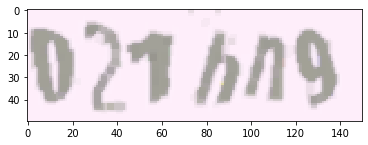

In [50]:
ex = cv2.imread(image_list[11])
ex = cv2.cvtColor(ex, cv2.COLOR_BGR2RGB)
plt.imshow(ex)

In [51]:
# True_label 저장
True_label = []
for i in range(len(image_list)):
    True_label.append(image_list[i][:-4])
#     True_label.append(list("".join(image_list[i][:-4])))

In [52]:
# image to text tesseract 적용
result = []
result_time = 0
for i in image_list:
    txt, t = ImgToText(i, lang_trained_data)
    result.append(txt)
    result_time+=t

In [53]:
print("Image to Text, Converted Time : ", result_time)

Image to Text, Converted Time :  4325.197547912598


In [77]:
# 평가
new_result,count, acc = tess_Accuracy(True_label, result)
print("Number of words : ", len(True_label))
print("Correct words of Tesseract-OCR : ", count)
print("Accuracy of Tesseract-OCR : ", acc)

Number of words :  10000
Correct words of Tesseract-OCR :  12
Accuracy of Tesseract-OCR :  0.0012


### Tesseract가 맞춘 데이터 이미지

In [78]:
correct_list=[]
for i in range(len(True_label)):
    if True_label[i]==new_result[i]:
        correct_list.append(True_label[i]+".png")

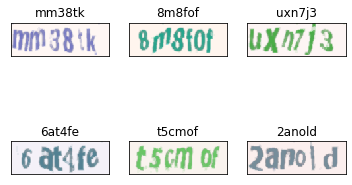

In [82]:
def draw_img(img_lst, row, col):
    img = []
    img_name = []
    for i in range(row*col):
        random_img = random.choice(img_lst)
        img.append(cv2.imread(random_img))
        img_name.append(random_img[:-4])
        
        
        plt.subplot(int(str(row)+str(col)+"1")+i)
        plt.imshow(img[i])
        plt.title(img_name[i])

        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        
    plt.show()
    
    
draw_img(correct_list, 2,3)